<a href="https://colab.research.google.com/github/austin-yao/rookie-wrs/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Phishing URLs using ML
## Eric Hashimoto, Matt (Jiwoong) Park, Austin Yao, Julia Zhao

We propose to predict what URLs are phishing from datasets of URLs with distinct features like the IP address, symbols, number of special characters

#### **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Data preprocessing

In [ ]:
!pip install warcio pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 417.9 kB/s eta 0:00:00


In [ ]:
!pip install nest_asyncio


In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
import requests
import tarfile
from io import BytesIO
import pandas as pd
from tqdm import tqdm

## Get Phishing URLs

In [ ]:
# URL of 650k+ phishing domains
url = 'https://github.com/mitchellkrogza/Phishing.Database/raw/master/ALL-phishing-domains.tar.gz'

# URL of 1mi+ phishing links
url = 'https://github.com/mitchellkrogza/Phishing.Database/raw/master/ALL-phishing-links.tar.gz'


response = requests.get(url)

df_phishing = pd.DataFrame()

if response.status_code == 200:
    print("Download successful!")

    file_like_object = BytesIO(response.content)

    with tarfile.open(mode="r:gz", fileobj=file_like_object) as tar:
        for member in tar.getmembers():
            if member.name.endswith('.txt'):
                extracted_file = tar.extractfile(member)
                lines = extracted_file.read().decode('utf-8').splitlines()

                df_phishing = pd.DataFrame(lines, columns=['URL'])
else:
    print("Failed to download the file")


Download successful!


In [ ]:
df_phishing

,URL
0,ftp://188.128.111.33/IPTV/TV1324/view.html
1,ftp://188.128.111.33/web/sec.htm
2,ftp://me@createkindlebooks.org:Noobasshole@cre...
3,http://000000000000000000000000000000000000000...
4,http://00000000000000000000000000000000000000d...
...,...
1185092,http://zzzxm.mylp.kz/?new=1626225230407
1185093,http://zzzxxchatwhatsappcrakdhv.duckdns.org
1185094,http://zzzzascz.000webhostapp.com
1185095,http://zzzzmetamaskzzzz.dray-dns.de/recover


## Get some legit URLs using Common Crawl (CC)

In [ ]:
!wget https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00000.warc.gz
!wget https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00001.warc.gz
!wget https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00002.warc.gz
!wget https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00003.warc.gz
!wget https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00004.warc.gz
!wget https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00005.warc.gz

--2024-05-12 23:17:37--  https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00000.warc.gz
Resolving data.commoncrawl.org (data.commoncrawl.org)... 13.224.50.33, 13.224.50.93, 13.224.50.25, ...
Connecting to data.commoncrawl.org (data.commoncrawl.org)|13.224.50.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 957397367 (913M) [application/octet-stream]
Saving to: ‘CC-MAIN-20240412101354-20240412131354-00000.warc.gz’

CC-MAIN-20240412101 100%[===================>] 913.04M  55.0MB/s    in 17s     

2024-05-12 23:17:54 (54.0 MB/s) - ‘CC-MAIN-20240412101354-20240412131354-00000.warc.gz’ saved [957397367/957397367]

--2024-05-12 23:17:55--  https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00001.warc.gz
Resolving data.commoncrawl.org (data.commoncrawl.org)... 13.224.50.33, 13.224.50.93, 13.224.50.25, ...
Connecting to

In [ ]:
!wget https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00006.warc.gz
!wget https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00007.warc.gz
!wget https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00008.warc.gz
!wget https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00009.warc.gz
!wget https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00010.warc.gz

--2024-05-12 23:19:36--  https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00006.warc.gz
Resolving data.commoncrawl.org (data.commoncrawl.org)... 13.33.21.65, 13.33.21.55, 13.33.21.38, ...
Connecting to data.commoncrawl.org (data.commoncrawl.org)|13.33.21.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 958945986 (915M) [application/octet-stream]
Saving to: ‘CC-MAIN-20240412101354-20240412131354-00006.warc.gz’

CC-MAIN-20240412101 100%[===================>] 914.52M  60.4MB/s    in 16s     

2024-05-12 23:19:52 (58.9 MB/s) - ‘CC-MAIN-20240412101354-20240412131354-00006.warc.gz’ saved [958945986/958945986]

--2024-05-12 23:19:52--  https://data.commoncrawl.org/crawl-data/CC-MAIN-2024-18/segments/1712296815919.75/warc/CC-MAIN-20240412101354-20240412131354-00007.warc.gz
Resolving data.commoncrawl.org (data.commoncrawl.org)... 13.33.21.65, 13.33.21.55, 13.33.21.38, ...
Connecting to data.c

In [ ]:
from warcio.archiveiterator import ArchiveIterator

def extract_urls_from_warc(warc_paths):
    urls = []
    for warc_path in warc_paths:
      with open(warc_path, 'rb') as stream:
          for record in tqdm(ArchiveIterator(stream)):
              if record.rec_type == 'response':
                  url = record.rec_headers.get_header('WARC-Target-URI')
                  urls.append(url)
    return urls

warc_files = ['CC-MAIN-20240412101354-20240412131354-00001.warc.gz',
              'CC-MAIN-20240412101354-20240412131354-00002.warc.gz',
              'CC-MAIN-20240412101354-20240412131354-00003.warc.gz',
              'CC-MAIN-20240412101354-20240412131354-00004.warc.gz',
              'CC-MAIN-20240412101354-20240412131354-00005.warc.gz',
              'CC-MAIN-20240412101354-20240412131354-00006.warc.gz',
              'CC-MAIN-20240412101354-20240412131354-00007.warc.gz',
              'CC-MAIN-20240412101354-20240412131354-00008.warc.gz',
              'CC-MAIN-20240412101354-20240412131354-00009.warc.gz',
              'CC-MAIN-20240412101354-20240412131354-00010.warc.gz',
              ]

url_list = extract_urls_from_warc(warc_files)

df_valid = pd.DataFrame(url_list, columns=['URL'])

df_valid

91768it [00:41, 2213.85it/s]
91495it [00:39, 2325.77it/s]
91144it [00:41, 2212.70it/s]
91108it [01:07, 1351.22it/s]
90118it [00:52, 1724.57it/s]
90688it [00:44, 2039.05it/s]
91099it [00:40, 2260.17it/s]
91183it [00:41, 2212.51it/s]
90403it [00:38, 2348.98it/s]
92293it [01:02, 1471.93it/s]


,URL
0,http://01annonces.topquebec.ca/Mail.asp?send=r...
1,http://028tz.com/type1.asp?smallclassid=261&bi...
2,http://092.onlain-kniga.ru/?c=174
3,http://0927200616.com/m2/showobj.php?objno=a16...
4,http://101559.025tk.com/topic/602.html
...,...
303758,https://zw3d.com.pl/ostatni-raz-w-tym-roku-sko...
303759,https://zwergerl-magazin.de/Neuigkeiten/allgem...
303760,"https://zwierciadlo.pl/psychologia/11228,1,zao..."
303761,https://zwiggelaarauctions.nl/Lot/7728


In [ ]:
df_valid.to_csv('valid2.csv')

In [ ]:
# df1 = pd.read_csv('valid1.csv')
df2 = pd.read_csv('valid2.csv')
df_valid = pd.concat([df_phishing, df2], ignore_index=True)
df_valid = df_valid.drop(columns=['Unnamed: 0'])
df_valid

,URL
0,ftp://188.128.111.33/IPTV/TV1324/view.html
1,ftp://188.128.111.33/web/sec.htm
2,ftp://me@createkindlebooks.org:Noobasshole@cre...
3,http://000000000000000000000000000000000000000...
4,http://00000000000000000000000000000000000000d...
...,...
1488855,https://zw3d.com.pl/ostatni-raz-w-tym-roku-sko...
1488856,https://zwergerl-magazin.de/Neuigkeiten/allgem...
1488857,"https://zwierciadlo.pl/psychologia/11228,1,zao..."
1488858,https://zwiggelaarauctions.nl/Lot/7728


## Add features

In [ ]:
!pip install whois
!pip install dnspython
!pip install pydnsbl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7


In [ ]:
import re
from urllib.parse import urlparse
from tqdm import tqdm
from datetime import datetime
import ssl

# For domain based features
# import whois
# import dns.resolver
# import pydnsbl

def extract_features(url):
    features = {}
    parsed_url = urlparse(url)
    domain = parsed_url.netloc.split(':')[0].strip('www.')

    path = parsed_url.path
    query = parsed_url.query

    # Features based on the string
    features['length'] = len(url)
    features['has_ip'] = int(bool(re.search(r'[0-9]+\.[0-9]+\.[0-9]+\.[0-9]+', parsed_url.netloc)))
    features['is_https'] = int(parsed_url.scheme == 'https')
    features['has_at'] = int('@' in url)

    features['num_dots'] = url.count('.')
    features['num_dash'] = url.count('-')
    features['num_percent'] = url.count('%')
    features['num_query_components'] = len(query.split('&')) if query else 0
    # Check if 'https' is incorrectly placed in the hostname part.
    features['https_in_hostname'] = int('https:' in parsed_url.netloc)
    features['path_level'] = path.count('/') if path else 0
    features['path_length'] = len(path)
    features['num_numeric_chars'] = len(re.findall(r'[0-9]', url))


    # Domain-based features
    # try:
    #     # Whois
    #     w = whois.whois(domain)
    #     features['domain_age_days'] = (datetime.now() - w.creation_date).days if w.creation_date else -1
    #     features['domain_expiry_days'] = (w.expiration_date - datetime.now()).days if w.expiration_date else -1
    # except:
    #     features['domain_age_days'] = -1
    #     features['domain_expiry_days'] = -1

    # try:
    #     dns_info = dns.resolver.resolve(domain, 'MX')
    #     features['has_mx_record'] = 1
    # except:
    #     features['has_mx_record'] = 0

    # # Check DNS blacklist
    # dnsbl_checker = pydnsbl.DNSBLChecker()
    # result = dnsbl_checker.check(domain)
    # features['is_blacklisted'] = int(result.blacklisted)

    # try:
    #     # SSL Certificate Chain
    #     cert = ssl.get_server_certificate((domain, 443))
    #     x509 = ssl.DER_cert_to_PEM_cert(cert)
    #     features['ssl_chain_length'] = len(ssl.PEM_cert_to_DER_cert(x509))  # Simplified example
    # except Exception as e:
    #     features['ssl_chain_length'] = 0

    return features

def preprocess_urls(df):
  features_list = [extract_features(url) for url in tqdm(df['URL'], desc="Processing URLs")]
  features_df = pd.DataFrame(features_list)
  return pd.concat([df, features_df], axis=1)


In [ ]:
preprocessed_df_valid = preprocess_urls(df_valid)

Processing URLs: 100%|██████████| 1488860/1488860 [01:39<00:00, 14979.15it/s]


In [ ]:
preprocessed_df_valid

,URL,length,has_ip,is_https,has_at,num_dots,num_dash,num_percent,num_query_components,https_in_hostname,path_level,path_length,num_numeric_chars
0,ftp://188.128.111.33/IPTV/TV1324/view.html,42,1,0,0,4,0,0,0,0,3,22,15
1,ftp://188.128.111.33/web/sec.htm,32,1,0,0,4,0,0,0,0,2,12,11
2,ftp://me@createkindlebooks.org:Noobasshole@cre...,75,0,0,1,3,0,0,0,0,1,11,0
3,http://000000000000000000000000000000000000000...,52,0,0,0,1,0,0,0,0,0,0,41
4,http://00000000000000000000000000000000000000d...,167,0,0,0,8,1,0,3,0,5,43,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488855,https://zw3d.com.pl/ostatni-raz-w-tym-roku-sko...,81,0,1,0,2,11,0,0,0,2,62,2
1488856,https://zwergerl-magazin.de/Neuigkeiten/allgem...,108,0,1,0,1,7,2,0,0,4,81,1
1488857,"https://zwierciadlo.pl/psychologia/11228,1,zao...",112,0,1,0,2,8,0,0,0,2,90,6
1488858,https://zwiggelaarauctions.nl/Lot/7728,38,0,1,0,1,0,0,0,0,2,9,4


In [ ]:
preprocessed_df_phi = preprocess_urls(df_phishing)
preprocessed_df_phi

Processing URLs: 100%|██████████| 1185097/1185097 [01:17<00:00, 15305.43it/s]


,URL,length,has_ip,is_https,has_at,num_dots,num_dash,num_percent,num_query_components,https_in_hostname,path_level,path_length,num_numeric_chars
0,ftp://188.128.111.33/IPTV/TV1324/view.html,42,1,0,0,4,0,0,0,0,3,22,15
1,ftp://188.128.111.33/web/sec.htm,32,1,0,0,4,0,0,0,0,2,12,11
2,ftp://me@createkindlebooks.org:Noobasshole@cre...,75,0,0,1,3,0,0,0,0,1,11,0
3,http://000000000000000000000000000000000000000...,52,0,0,0,1,0,0,0,0,0,0,41
4,http://00000000000000000000000000000000000000d...,167,0,0,0,8,1,0,3,0,5,43,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185092,http://zzzxm.mylp.kz/?new=1626225230407,39,0,0,0,2,0,0,1,0,1,1,13
1185093,http://zzzxxchatwhatsappcrakdhv.duckdns.org,43,0,0,0,2,0,0,0,0,0,0,0
1185094,http://zzzzascz.000webhostapp.com,33,0,0,0,2,0,0,0,0,0,0,3
1185095,http://zzzzmetamaskzzzz.dray-dns.de/recover,43,0,0,0,2,1,0,0,0,1,8,0


In [ ]:
preprocessed_df_valid['is_phishing'] = 0
preprocessed_df_phi['is_phishing'] = 1

In [ ]:
final_dataset = pd.concat([preprocessed_df_valid, preprocessed_df_phi], ignore_index=True)
final_dataset

,URL,length,has_ip,is_https,has_at,num_dots,num_dash,num_percent,num_query_components,https_in_hostname,path_level,path_length,num_numeric_chars,is_phishing
0,ftp://188.128.111.33/IPTV/TV1324/view.html,42,1,0,0,4,0,0,0,0,3,22,15,0
1,ftp://188.128.111.33/web/sec.htm,32,1,0,0,4,0,0,0,0,2,12,11,0
2,ftp://me@createkindlebooks.org:Noobasshole@cre...,75,0,0,1,3,0,0,0,0,1,11,0,0
3,http://000000000000000000000000000000000000000...,52,0,0,0,1,0,0,0,0,0,0,41,0
4,http://00000000000000000000000000000000000000d...,167,0,0,0,8,1,0,3,0,5,43,41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673952,http://zzzxm.mylp.kz/?new=1626225230407,39,0,0,0,2,0,0,1,0,1,1,13,1
2673953,http://zzzxxchatwhatsappcrakdhv.duckdns.org,43,0,0,0,2,0,0,0,0,0,0,0,1
2673954,http://zzzzascz.000webhostapp.com,33,0,0,0,2,0,0,0,0,0,0,3,1
2673955,http://zzzzmetamaskzzzz.dray-dns.de/recover,43,0,0,0,2,1,0,0,0,1,8,0,1


In [ ]:
final_dataset.to_parquet('preprocessed_data.parquet')

# **1. Phishing detection using Random Forests**

## **Import data**

In [ ]:
# df = pd.read_csv('Phishing_dataset_predict.csv')
df = final_dataset
df.head()

,URL,length,has_ip,is_https,has_at,num_dots,num_dash,num_percent,num_query_components,https_in_hostname,path_level,path_length,num_numeric_chars,is_phishing
0,ftp://188.128.111.33/IPTV/TV1324/view.html,42,1,0,0,4,0,0,0,0,3,22,15,0
1,ftp://188.128.111.33/web/sec.htm,32,1,0,0,4,0,0,0,0,2,12,11,0
2,ftp://me@createkindlebooks.org:Noobasshole@cre...,75,0,0,1,3,0,0,0,0,1,11,0,0
3,http://000000000000000000000000000000000000000...,52,0,0,0,1,0,0,0,0,0,0,41,0
4,http://00000000000000000000000000000000000000d...,167,0,0,0,8,1,0,3,0,5,43,41,0


## **Clean data**

In [ ]:
def prepare_data(df: pd.DataFrame):
    """
    Load, preprocess the data, and split it into training, validation, and test sets.

    Args:
    df (pd.Dataframe): Raw dataframe.

    Returns:
    tuple: A tuple containing the training, validation, and test sets:
           (X_train, X_val, X_test, y_train, y_val, y_test)
    """
    df = df.drop(columns=['URL'])  # drop the first column
    df = df.dropna()  # drop rows with missing values

    df = df.sample(100000)
    X = df.drop('is_phishing', axis=1)  # features
    y = df['is_phishing']  # target

    # Split the data into training and temporary sets (test + validation)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.66, random_state=42)

    # Split the temporary set into validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(df)

# Feature Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


## **Training**


In [ ]:
# Function that runs RandomForestClassifier on different values of n_estimators
# and max_depth to empirically determine the best combination

def evaluate_random_forest(X_train, y_train, X_test, y_test):
    n_estimators_range = [10, 50, 100, 200]
    max_depth_range = [5, 10, 20, 50]

    # Initialize arrays to store the scores
    accuracies = np.zeros((len(n_estimators_range), len(max_depth_range)))
    f1_scores = np.zeros((len(n_estimators_range), len(max_depth_range)))

    # Iterate over all combinations of n_estimators and max_depth
    for i, n_estimators in enumerate(n_estimators_range):
        for j, max_depth in enumerate(max_depth_range):
            model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)

            accuracies[i, j] = accuracy_score(y_test, y_test_pred)
            f1_scores[i, j] = f1_score(y_test, y_test_pred, average='binary')

    # Plotting the results
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    for idx, metric in enumerate([accuracies, f1_scores]):
        cax = axes[idx].matshow(metric, interpolation='nearest')
        fig.colorbar(cax, ax=axes[idx])
        axes[idx].set_title('Accuracy' if idx == 0 else 'F1 Score')
        axes[idx].set_xlabel('Max Depth')
        axes[idx].set_ylabel('N Estimators')
        axes[idx].set_xticks(np.arange(len(max_depth_range)))
        axes[idx].set_xticklabels(max_depth_range)
        axes[idx].set_yticks(np.arange(len(n_estimators_range)))
        axes[idx].set_yticklabels(n_estimators_range)

    plt.show()

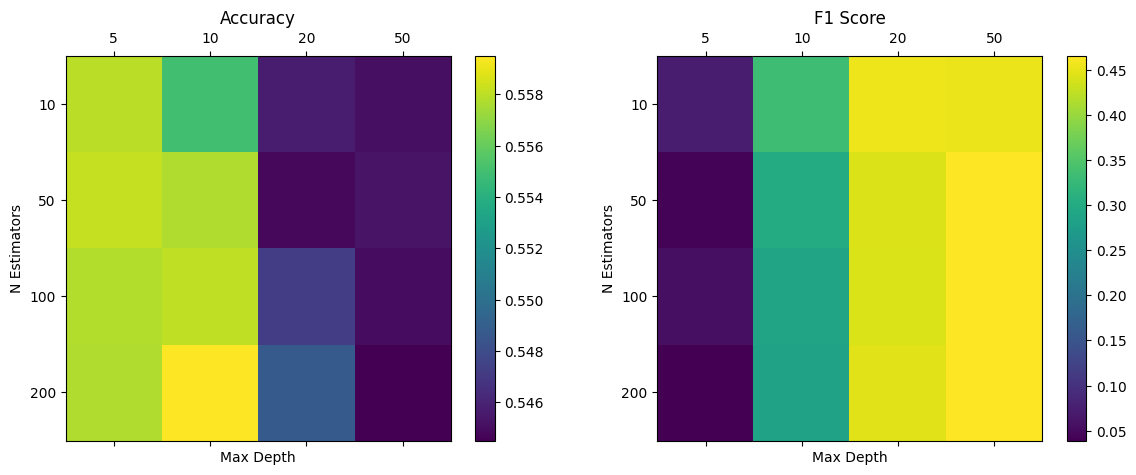

In [ ]:
# Takes 3 minutes to run
evaluate_random_forest(X_train, y_train, X_test, y_test)

In [ ]:
# Empirically, n_estimators=50 and max_depth=10 give a good balance between
# accuracy (>0.85) and F1 score (<0.2)
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

## **Validation**

In [ ]:
print("Validation Set Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Set Accuracy Score:", accuracy_score(y_val, y_val_pred))
print("Validation Set F1 Score:", f1_score(y_val, y_val_pred, average='binary', zero_division=0))

Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.83      0.67     18317
           1       0.49      0.21      0.29     14683

    accuracy                           0.55     33000
   macro avg       0.53      0.52      0.48     33000
weighted avg       0.53      0.55      0.50     33000

Validation Set Accuracy Score: 0.551030303030303
Validation Set F1 Score: 0.2921842155551309


## **Testing**

In [ ]:
y_test_pred = model.predict(X_test)
print("Test Set Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Set Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Set F1 Score:", f1_score(y_test, y_test_pred, average='binary'))

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.83      0.68     18421
           1       0.50      0.22      0.30     14579

    accuracy                           0.56     33000
   macro avg       0.54      0.52      0.49     33000
weighted avg       0.54      0.56      0.51     33000

Test Set Accuracy Score: 0.5577272727272727
Test Set F1 Score: 0.30197522597924337


# **2. PCA on Phishing URL Detection Dataset**


Text(0, 0.5, 'Cumulative Explained Variance')

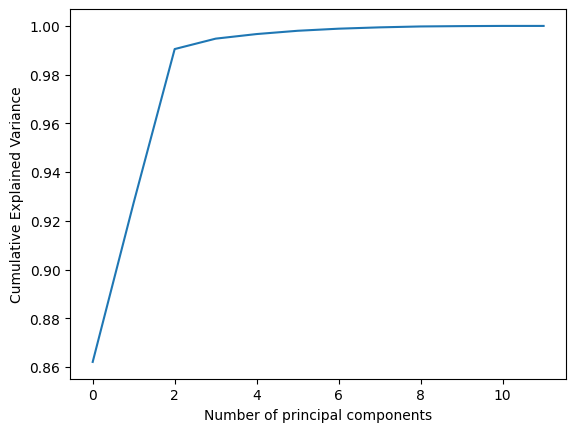

In [ ]:
pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative Explained Variance")

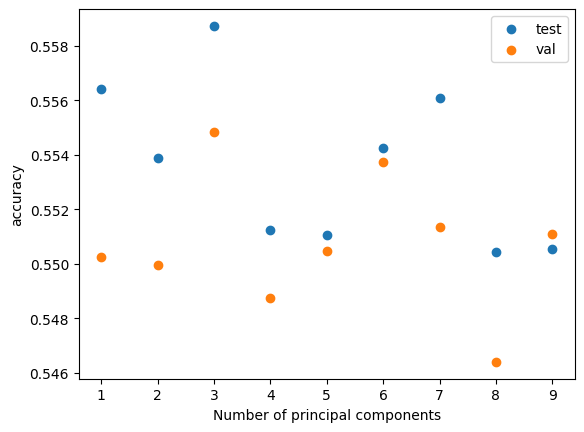

In [ ]:
accuracies = []
accuracies_val = []

for i in range(1, 10):
    pca = PCA(n_components = i)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_val_pca = pca.transform(X_val)
    model = RandomForestClassifier(n_estimators=1, max_depth=5, random_state=42)
    model.fit(X_train_pca, y_train)
    predicted_test = model.predict(X_test_pca)
    predicted_val = model.predict(X_val_pca)
    accuracies.append(sum(predicted_test == y_test) / len(predicted_test))
    accuracies_val.append(sum(predicted_val == y_val) / len(predicted_val))

plt.scatter([i for i in range(1, 10)], accuracies, label = "test")
plt.scatter([i for i in range(1, 10)], accuracies_val, label = "val")
plt.xlabel("Number of principal components")
plt.ylabel("accuracy")
plt.legend()
plt.show()


In [ ]:
pca = PCA(n_components = 3)
pca.fit(X_train)

components = pca.components_
top_three_features_indices = np.argsort(np.abs(components), axis=1)[:, -3:]
print("Top three features contributing to each component")
print(top_three_features_indices)


Top three features contributing to each component
[[5 1 2]
 [4 3 1]
 [7 1 3]]
feature 11, number of numeric chars, appears to contribute the most components. 


# **3. Phishing detection using KNN**

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(df)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def plot_KNN_boundary(k, X_train, y_train):
  h = 0.02
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
  X_test_2 = np.c_[xx.ravel(), yy.ravel()]
  y_test_2 = np.zeros(xx.shape)

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  print(f"\nClassification Report for: {k}")
  print(classification_report(y_test, y_pred))

  f1 = f1_score(y_test, y_pred)
  print("F1 Score:", f1)


k_values = [3, 5, 7, 11, 18]
for k in k_values:
  plot_KNN_boundary(k, X_train, y_train)


Classification Report for: 3
              precision    recall  f1-score   support

           0       0.59      0.59      0.59     18406
           1       0.48      0.47      0.47     14594

    accuracy                           0.54     33000
   macro avg       0.53      0.53      0.53     33000
weighted avg       0.54      0.54      0.54     33000

F1 Score: 0.4744429882044561

Classification Report for: 5
              precision    recall  f1-score   support

           0       0.59      0.60      0.59     18406
           1       0.48      0.47      0.48     14594

    accuracy                           0.54     33000
   macro avg       0.53      0.53      0.53     33000
weighted avg       0.54      0.54      0.54     33000

F1 Score: 0.4764439528533407

Classification Report for: 7
              precision    recall  f1-score   support

           0       0.59      0.61      0.60     18406
           1       0.48      0.46      0.47     14594

    accuracy                      

# **3. Phishing detection using KNN and PCA**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def plot_KNN_PCA_boundary(k, X_train, y_train):
  h = 0.02
  pca = PCA(n_components = 3)
  pca.fit(X_train)
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)
  x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
  y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
  X_test_2 = np.c_[xx.ravel(), yy.ravel()]
  y_test_2 = np.zeros(xx.shape)

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_pca, y_train)

  y_pred = knn.predict(X_test_pca)

  print(f"\nClassification Report for: {k} with PCA")
  print(classification_report(y_test, y_pred))

  f1 = f1_score(y_test, y_pred)
  print("F1 Score:", f1)


k_values = [3, 5, 7, 11, 18]
for k in k_values:
  plot_KNN_boundary(k, X_train, y_train)


Classification Report for: 3
              precision    recall  f1-score   support

           0       0.59      0.59      0.59     18406
           1       0.48      0.47      0.47     14594

    accuracy                           0.54     33000
   macro avg       0.53      0.53      0.53     33000
weighted avg       0.54      0.54      0.54     33000

F1 Score: 0.47449560269011903

Classification Report for: 5
              precision    recall  f1-score   support

           0       0.59      0.60      0.59     18406
           1       0.48      0.47      0.48     14594

    accuracy                           0.54     33000
   macro avg       0.53      0.53      0.53     33000
weighted avg       0.54      0.54      0.54     33000

F1 Score: 0.4768619319163643

Classification Report for: 7
              precision    recall  f1-score   support

           0       0.59      0.61      0.60     18406
           1       0.48      0.46      0.47     14594

    accuracy                     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **4. Phishing detection with neural networks**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import backend as K


# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(12,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),

    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#fit and train models
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)
print("Classfication report with binary cross entropy")
print(classification_report(y_test,  binary_predictions))

def weighted_binary_crossentropy(y_true, y_pred):
    # Binary cross-entropy loss
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    bce_loss = K.binary_crossentropy(y_true, y_pred)

    # Focal loss to address class imbalance and focus on hard examples
    alpha = 0.25  # Class balancing parameter
    gamma = 2.0  # Focusing parameter
    focal_loss = -alpha * (1 - y_pred) ** gamma * y_true * K.log(y_pred + K.epsilon()) \
                 - (1 - alpha) * y_pred ** gamma * (1 - y_true) * K.log(1 - y_pred + K.epsilon())

    # Dice coefficient loss to optimize for overlap between predicted and true positive regions
    dice_loss = 1 - (2 * K.sum(y_true * y_pred) + K.epsilon()) / (K.sum(y_true) + K.sum(y_pred) + K.epsilon())

    # Combine the individual losses with appropriate weights
    total_loss = 0.2 * bce_loss + 0.7 * focal_loss + 0.1 * dice_loss

    return total_loss

model.compile(optimizer='adam', loss=weighted_binary_crossentropy, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)
print("Classfication report with custom loss function")
print(classification_report(y_test,  binary_predictions))


Epoch 1/20
255/255 [==============================] - 5s 12ms/step - loss: 0.6878 - accuracy: 0.5455 - val_loss: 0.6860 - val_accuracy: 0.5490
Epoch 2/20
255/255 [==============================] - 3s 12ms/step - loss: 0.6862 - accuracy: 0.5512 - val_loss: 0.6859 - val_accuracy: 0.5490
Epoch 3/20
255/255 [==============================] - 1s 3ms/step - loss: 0.6855 - accuracy: 0.5518 - val_loss: 0.6853 - val_accuracy: 0.5490
Epoch 4/20
255/255 [==============================] - 1s 3ms/step - loss: 0.6851 - accuracy: 0.5525 - val_loss: 0.6851 - val_accuracy: 0.5490
Epoch 5/20
255/255 [==============================] - 1s 3ms/step - loss: 0.6845 - accuracy: 0.5520 - val_loss: 0.6844 - val_accuracy: 0.5490
Epoch 6/20
255/255 [==============================] - 1s 3ms/step - loss: 0.6840 - accuracy: 0.5527 - val_loss: 0.6842 - val_accuracy: 0.5490
Epoch 7/20
255/255 [==============================] - 1s 3ms/step - loss: 0.6846 - accuracy: 0.5532 - val_loss: 0.6842 - val_accuracy: 0.5490
Epoc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
